In [ ]:
<a target="_blank" href="https://colab.research.google.com/github/michpil19/ML_emotion_detection_project_scripts/blob/master/Emotion_Detection_with_results.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:

!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2022-06-13 06:59:58--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2022-06-13 06:59:58--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb8d88b0d29d71c7dcbdfdec2fa.dl.dropboxusercontent.com/cd/0/inline/BnECuFBS373qZuKf9E2Y52nMOCkbRuz35vm9xHMpsQvYqX9e2gq-1I6lJNyMZ3Buc5i1vPde53skra4t5ht9sqBXc2xI27IPnk_twpY2Ui__bfmFf5ccX2wcYehUZ6jg9Lx6IjTRDNaPzGH_-g3Vhb3stZC5PZPjPT83gbFqUvcTlg/file# [following]
--2022-06-13 06:59:58--  https://ucb8d88b0d29d71c7dcbdfdec2fa.dl.dropboxusercontent.com/cd/0/inline/BnECuFBS373qZuKf9E2Y52nMOCkbRuz35vm9xHMpsQvYqX9e2gq-1I6lJNyMZ3Buc5

In [ ]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [ ]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

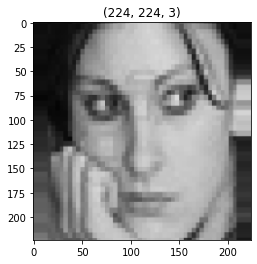

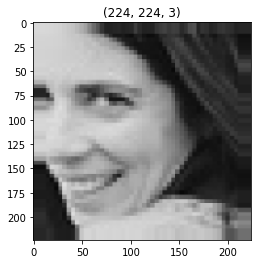

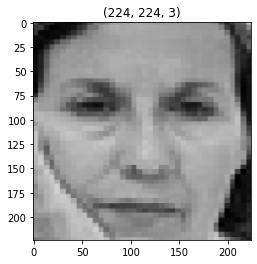

In [ ]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 3:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [ ]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.004 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model_test3.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 15, 
                           epochs= 50, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 17.8782 - accuracy: 0.2333
Epoch 1: val_accuracy improved from -inf to 0.34375, saving model to best_model_test3.h5
15/15 [==============================] - 17s 392ms/step - loss: 17.8782 - accuracy: 0.2333 - val_loss: 13.1896 - val_accuracy: 0.3438
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 9.4917 - accuracy: 0.3104
Epoch 2: val_accuracy improved from 0.34375 to 0.37891, saving model to best_model_test3.h5
15/15 [==============================] - 6s 380ms/step - loss: 9.4917 - accuracy: 0.3104 - val_loss: 8.9104 - val_accuracy: 0.3789
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 7.1127 - accuracy: 0.3771
Epoch 3: val_accuracy improved from 0.37891 to 0.41797, saving model to best_model_test3.h5
15/15 [==============================] - 6s 380ms/step - loss: 7.1127 - accuracy: 0.3771 - val_loss: 4.4238 - val_accuracy: 0.4180
Epoch 4/50
15/15 [==============================

In [ ]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model_test3.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

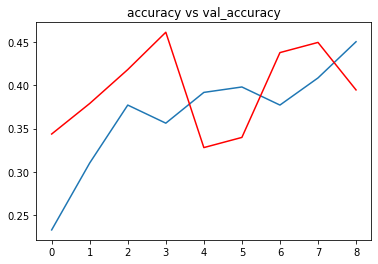

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("accuracy vs val_accuracy")
plt.show()

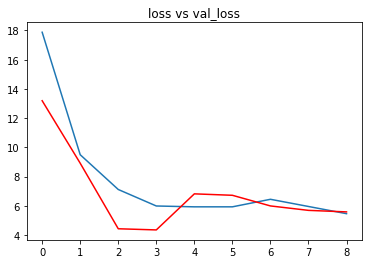

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs val_loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Outputs for myDataBase from extracted_faces_gray

In [ ]:
# path for the image to see if it predics correct class
print("OUR_DATA")
emotions = ["angry", "disgust", "fear","happy","neutral","sad","surprise"]#truth

arr_of_truth = []
arr_of_predictions = []

#path = "/content/test/happy/PrivateTest_95094.jpg"
#path = "/content/drive/MyDrive/ML_photos/hp48.jpg"
totalRightGuess = 0
totalWrongGuess = 0

for feeling in emotions:
  feelCorrect = 0
  feelWrong = 0
  for k in range(1,19):
    path = "/content/drive/MyDrive/extracted_faces_gray/extracted_faces_gray_" + feeling + "/image"+str(k)+".jpg"
    try:
      img = load_img(path, target_size=(224,224) )
      i = img_to_array(img)/255
      input_arr = np.array([i])
      input_arr.shape

      pred = np.argmax(model.predict(input_arr))

      # print("Label: " + feeling + " " + "image"+str(k)+".jpg")
      # print(f"Guess: {op[pred]}")

      arr_of_predictions.append(op[pred])
      arr_of_truth.append(feeling)

      if feeling.__eq__(op[pred]):#prediction
        #print("CORRECT")
        totalRightGuess+=1
        feelCorrect+=1
      else:
        #print("WRONG")
        totalWrongGuess+=1
        feelWrong+=1
    except FileNotFoundError:
      print("...")#print("no more files here i guess")
    
  print()
  print(feeling + " result: " + str(feelCorrect) +  "/" + str(feelWrong+feelCorrect) + " so: " + str(round(feelCorrect /(feelCorrect+feelWrong), 2)))


print()
print("Accuracy: " + str(totalRightGuess) +  "/" + str(totalRightGuess+totalWrongGuess) + " so: " +  str(round(totalRightGuess/(totalRightGuess+totalWrongGuess),2)))
print("Total number of guesses: " + str(totalRightGuess+totalWrongGuess))
# to display the image  
  # plt.imshow(input_arr[0])
  # plt.title("input image")
  # plt.show()


# print(arr_of_truth)
# print(len(arr_of_truth))
# print(arr_of_predictions)
# print(len(arr_of_predictions))

# print(arr_of_truth[0])
# print(arr_of_predictions[0])

# if arr_of_truth[0] == arr_of_predictions[0]:
#  print("YES")



OUR_DATA

angry result: 3/18 so: 0.17

disgust result: 0/18 so: 0.0
...

fear result: 4/17 so: 0.24

happy result: 13/18 so: 0.72
...

neutral result: 12/17 so: 0.71
...
...
...

sad result: 2/15 so: 0.13
...
...

surprise result: 0/16 so: 0.0

Accuracy: 34/119 so: 0.29
Total number of guesses: 119
['angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'neutral', 'neutral', 'neutral', 'neutral

##Scores with help of sklearn.metrics library

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# print("precision_score")
# print(precision_score(arr_of_truth,arr_of_predictions,average=None, zero_division=0))
# print("recall_score")
# print(recall_score(arr_of_truth,arr_of_predictions,average=None, zero_division=0))
# print("f1_score")
# print(f1_score(arr_of_truth,arr_of_predictions,average=None, zero_division=0))

print("classification_report")
print(classification_report(arr_of_truth,arr_of_predictions, zero_division=0))

classification_report
              precision    recall  f1-score   support

       angry       0.60      0.17      0.26        18
     disgust       0.00      0.00      0.00        18
        fear       0.12      0.24      0.16        17
       happy       0.68      0.72      0.70        18
     neutral       0.22      0.71      0.34        17
         sad       0.29      0.13      0.18        15
    surprise       0.00      0.00      0.00        16

    accuracy                           0.29       119
   macro avg       0.27      0.28      0.23       119
weighted avg       0.28      0.29      0.24       119



#Outputs for normalisedData from stockPhotos

In [ ]:
# path for the image to see if it predics correct class
emotions = ["angry", "disgust", "fear","happy","neutral","sad","surprise"]

arr_of_truth = []
arr_of_predictions = []

totalRightGuess = 0
totalWrongGuess = 0
for feeling in emotions:
  feelCorrect = 0
  feelWrong = 0
  for m in range(1,10):
    path = "/content/drive/MyDrive/normalisedData/" + feeling + "/"+str(m)+".jpg"
    try:
      img = load_img(path, target_size=(224,224) )

      i = img_to_array(img)/255
      input_arr = np.array([i])
      input_arr.shape

      pred = np.argmax(model.predict(input_arr))

      arr_of_predictions.append(op[pred])
      arr_of_truth.append(feeling)

      #print("Label: " + feeling + " " + str(m)+".jpg")
      #print(f"Guess: {op[pred]}")
      if feeling.__eq__(op[pred]):
        #print("CORRECT")
        totalRightGuess+=1
        feelCorrect+=1
      else:
        #print("WRONG")
        totalWrongGuess+=1
        feelWrong+=1
    except FileNotFoundError:
      print("...")#print("no more files here i guess")

  print()
  print(feeling + " result: " + str(feelCorrect) +  "/" + str(feelWrong+feelCorrect) + " so: " + str(round(feelCorrect /(feelCorrect+feelWrong), 2)))
print()
print("Accuracy: " + str(totalRightGuess) +  "/" + str(totalRightGuess+totalWrongGuess) + " so: " +  str(round(totalRightGuess/(totalRightGuess+totalWrongGuess),2)))
print("Total number of guesses: " + str(totalRightGuess+totalWrongGuess))
# to display the image  
  # plt.imshow(input_arr[0])
  # plt.title("input image")
  # plt.show()

# print(arr_of_truth)
# print(len(arr_of_truth))
# print(arr_of_predictions)
# print(len(arr_of_predictions))

# print(arr_of_truth[0])
# print(arr_of_predictions[0])

# if arr_of_truth[0] == arr_of_predictions[0]:
#  print("YES")



angry result: 5/9 so: 0.56

disgust result: 0/9 so: 0.0
...
...

fear result: 1/7 so: 0.14

happy result: 6/9 so: 0.67

neutral result: 7/9 so: 0.78
...
...

sad result: 3/7 so: 0.43
...

surprise result: 5/8 so: 0.62

Accuracy: 27/58 so: 0.47
Total number of guesses: 58
['angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'fear', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise', 'surprise']
58
['fear', 'angry', 'neutral', 'angry', 'angry', 'neutral', 'angry', 'fear', 'angry', 'sad', 'neutral', 'sad', 'happy', 'sad', 'sad', 'happy', 'angry', 'fear', 'sad

In [ ]:

# print("precision_score")
# print(precision_score(arr_of_truth,arr_of_predictions,average=None, zero_division=0))
# print("recall_score")
# print(recall_score(arr_of_truth,arr_of_predictions,average=None, zero_division=0))
# print("f1_score")
# print(f1_score(arr_of_truth,arr_of_predictions,average=None, zero_division=0))

print("classification_report")
print(classification_report(arr_of_truth,arr_of_predictions, zero_division=0))

classification_report
              precision    recall  f1-score   support

       angry       0.71      0.56      0.63         9
     disgust       0.00      0.00      0.00         9
        fear       0.11      0.14      0.12         7
       happy       0.55      0.67      0.60         9
     neutral       0.54      0.78      0.64         9
         sad       0.23      0.43      0.30         7
    surprise       1.00      0.62      0.77         8

    accuracy                           0.47        58
   macro avg       0.45      0.46      0.44        58
weighted avg       0.46      0.47      0.45        58

